<a href="https://colab.research.google.com/github/gustav2k22/GRP12_BCS206_StudentDepression/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Adding all needed libraries
!pip install scikit-learn pandas numpy matplotlib seaborn plotly

# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, log_loss, roc_auc_score,
                            precision_score, recall_score, f1_score,
                            confusion_matrix, classification_report, roc_curve)
import warnings
warnings.filterwarnings('ignore')

# Setting style for better visual plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
df = pd.read_csv('//content/drive/MyDrive/GRP12_BCS206_StudentDepression/dataset/student_depression_dataset.csv')

# Basic dataset information
print("📊 DATASET OVERVIEW")
print("="*50)
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\n📋 First 5 rows:")
print(df.head())

print("\n📈 Dataset Info:")
print(df.info())

print("\n📊 Statistical Summary:")
print(df.describe())

print("\n🔍 Missing Values:")
print(df.isnull().sum())

# Based on your screenshot, the target column appears to be 'Depression'
target_column = 'Depression'
print(f"\n🎯 Target Column: {target_column}")
print(f"Target Distribution:")
if target_column in df.columns:
    print(df[target_column].value_counts())
else:
    print("⚠️ Please check the exact target column name")

📊 DATASET OVERVIEW
Dataset Shape: (27901, 18)
Columns: ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']

📋 First 5 rows:
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0

🎯 DATASET JUSTIFICATION

📌 DATASET: Student Depression Dataset

🔍 RELEVANCE TO PREDICTIVE TASK:
- Mental health is a critical issue among students globally
- Early detection of depression can enable timely intervention
- Dataset contains comprehensive student information including:
  * Demographics: Age, Gender, City
  * Academic factors: Academic Pressure, CGPA, Study Satisfaction
  * Social factors: Work Pressure, Job Satisfaction
  * Health factors: Sleep Duration, Dietary Habits
  * Mental health indicators: Suicidal thoughts, Family History
- Classification problem: Predict presence/absence of depression
- Real-world application with significant social impact

🎯 PREDICTIVE OBJECTIVE:
Build an advanced ensemble model to classify students as having depression based on:
- Academic performance and pressure levels
- Social and work-related stress factors
- Lifestyle and health indicators
- Demographics and family history
- Sleep patterns and dietary habits


📊 Target Variable Distribut

<Figure size 1000x600 with 0 Axes>

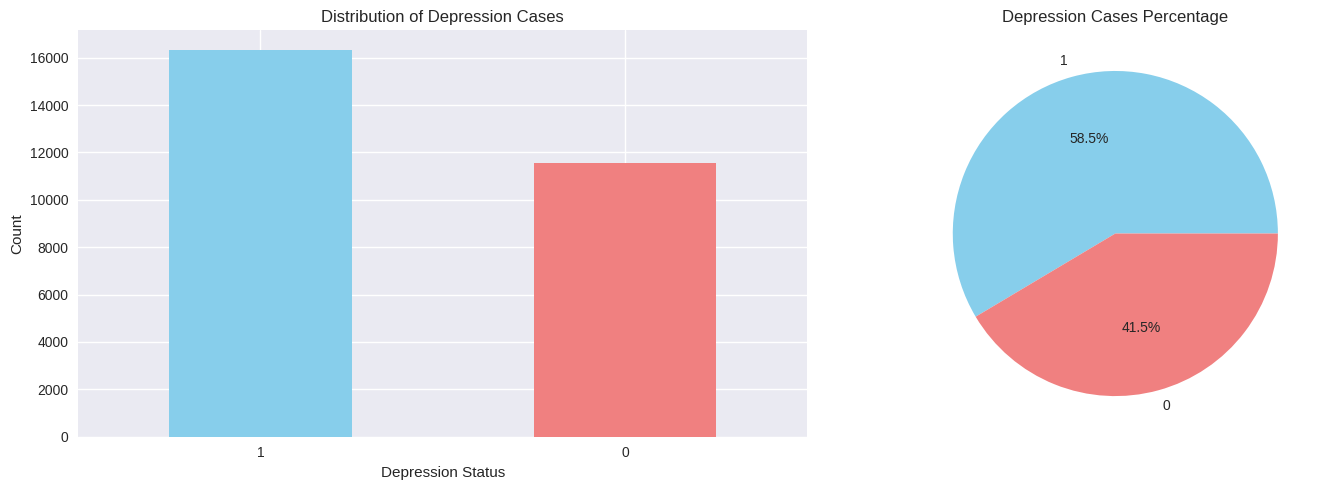

In [5]:
print("🎯 DATASET JUSTIFICATION")
print("="*50)
print("""
📌 DATASET: Student Depression Dataset

🔍 RELEVANCE TO PREDICTIVE TASK:
- Mental health is a critical issue among students globally
- Early detection of depression can enable timely intervention
- Dataset contains comprehensive student information including:
  * Demographics: Age, Gender, City
  * Academic factors: Academic Pressure, CGPA, Study Satisfaction
  * Social factors: Work Pressure, Job Satisfaction
  * Health factors: Sleep Duration, Dietary Habits
  * Mental health indicators: Suicidal thoughts, Family History
- Classification problem: Predict presence/absence of depression
- Real-world application with significant social impact

🎯 PREDICTIVE OBJECTIVE:
Build an advanced ensemble model to classify students as having depression based on:
- Academic performance and pressure levels
- Social and work-related stress factors
- Lifestyle and health indicators
- Demographics and family history
- Sleep patterns and dietary habits
""")

# Analyze target variable using your dataset structure
target_col = 'Depression'  # Based on your screenshot
if target_col in df.columns:
    print(f"\n📊 Target Variable Distribution:")
    print(df[target_col].value_counts())

    plt.figure(figsize=(10, 6))

    # Create subplot for better visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Count plot
    df[target_col].value_counts().plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
    ax1.set_title('Distribution of Depression Cases')
    ax1.set_xlabel('Depression Status')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=0)

    # Pie chart
    df[target_col].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    ax2.set_title('Depression Cases Percentage')
    ax2.set_ylabel('')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Please identify the correct target column name in your dataset")

In [8]:
print("🔧 DATA PREPROCESSING")
print("="*50)

# Handling the preprocessing properly
print("Original dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# Target column
target_col = 'Depression'

# Handle missing values if any
print("Checking for missing values...")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Fill missing values if they exist
if missing_values.sum() > 0:
    # Fill numerical columns with median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

    # Fill categorical columns with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col != target_col:
            df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables
print("Encoding categorical variables...")
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col != target_col:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded {col}: {le.classes_}")

# Prepare features and target
X = df.drop([target_col], axis=1)
y = df[target_col]

# Encode target variable if it's categorical
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)
    print(f"Target classes: {le_target.classes_}")

print(f"\n✅ Features shape: {X.shape}")
print(f"✅ Target shape: {y.shape}")
print(f"✅ Feature columns: {X.columns.tolist()}")
print(f"✅ Target distribution: {np.bincount(y)}")

🔧 DATA PREPROCESSING
Original dataset shape: (27901, 18)
Columns: ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']
Checking for missing values...
Series([], dtype: int64)
Encoding categorical variables...

✅ Features shape: (27901, 17)
✅ Target shape: (27901,)
✅ Feature columns: ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness']
✅ Target distribution: [11565 16336]


In [9]:
print("🤖 ENSEMBLE LEARNING/ ADVANCED STACKING MODEL DEVELOPMENT")
print("="*50)

# Import additional libraries for stacking
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Training set: {X_train_scaled.shape}")
print(f"✅ Testing set: {X_test_scaled.shape}")

# Define base models for stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('nb', GaussianNB())
]

# Define meta-model (final estimator)
meta_model = LogisticRegression(random_state=42)

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,  # 5-fold cross-validation for generating meta-features
    stack_method='predict_proba',  # Use probabilities for meta-features
    n_jobs=-1
)

print("🚀 Training Stacking Classifier...")
print("Base Models:")
for name, model in base_models:
    print(f"  • {name}: {model.__class__.__name__}")
print(f"Meta Model: {meta_model.__class__.__name__}")

# Train the Ensemble/ stacking classifier
stacking_clf.fit(X_train_scaled, y_train)

print("\n✅ Ensemble/ Stacking Classifier trained successfully!")

# Also train individual base models for comparison
print("\n📊 INDIVIDUAL BASE MODEL PERFORMANCE:")
individual_results = {}

for name, model in base_models:
    # Train individual model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)

    individual_results[name] = {'accuracy': accuracy, 'auc': auc, 'f1': f1}
    print(f"{name.upper():>3}: Accuracy={accuracy:.4f}, AUC={auc:.4f}, F1={f1:.4f}")

# Test stacking classifier
print(f"\n🏆 ENSEMBLE/ STACKING CLASSIFIER PERFORMANCE:")
stacking_pred = stacking_clf.predict(X_test_scaled)
stacking_pred_proba = stacking_clf.predict_proba(X_test_scaled)[:, 1]

stacking_accuracy = accuracy_score(y_test, stacking_pred)
stacking_auc = roc_auc_score(y_test, stacking_pred_proba)
stacking_f1 = f1_score(y_test, stacking_pred)

print(f"ENSEMBLE/ STACKING: Accuracy={stacking_accuracy:.4f}, AUC={stacking_auc:.4f}, F1={stacking_f1:.4f}")

# Set the best model as our stacking classifier for further analysis
final_model = stacking_clf
best_model_name = "Ensemble/ Stacking Classifier"

print(f"\n🎯 Selected Model: {best_model_name}")

🤖 ENSEMBLE LEARNING/ ADVANCED STACKING MODEL DEVELOPMENT
✅ Training set: (22320, 17)
✅ Testing set: (5581, 17)
🚀 Training Stacking Classifier...
Base Models:
  • rf: RandomForestClassifier
  • svm: SVC
  • gb: GradientBoostingClassifier
  • knn: KNeighborsClassifier
  • nb: GaussianNB
Meta Model: LogisticRegression

✅ Ensemble/ Stacking Classifier trained successfully!

📊 INDIVIDUAL BASE MODEL PERFORMANCE:
 RF: Accuracy=0.8396, AUC=0.9134, F1=0.8648
SVM: Accuracy=0.8420, AUC=0.9100, F1=0.8680
 GB: Accuracy=0.8464, AUC=0.9189, F1=0.8709
KNN: Accuracy=0.8138, AUC=0.8701, F1=0.8446
 NB: Accuracy=0.5852, AUC=0.9144, F1=0.7383

🏆 ENSEMBLE/ STACKING CLASSIFIER PERFORMANCE:
ENSEMBLE/ STACKING: Accuracy=0.8439, AUC=0.9189, F1=0.8686

🎯 Selected Model: Ensemble/ Stacking Classifier


In [24]:
print("⚙️ STACKING MODEL HYPERPARAMETER TUNING")
print("="*50)

# Define hyperparameter grids for base models
base_param_grids = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5],

    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['rbf', 'linear'],

    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.01, 0.1],
    'gb__max_depth': [3, 5],

    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

# Meta-model parameters
meta_param_grid = {
    'final_estimator__C': [0.1, 1, 10],
    'final_estimator__penalty': ['l2']
}

# Combine parameter grids
param_grid = {**base_param_grids, **meta_param_grid}

print("🔍 Performing Grid Search for Stacking Classifier...")
print("Parameter combinations to test:", len(list(param_grid.keys())))

# Create a smaller grid for demonstration (full grid would take too long)
simplified_param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, None],
    'svm__C': [1, 10],
    'gb__n_estimators': [100],
    'gb__learning_rate': [0.1],
    'final_estimator__C': [1, 10]
}

# Grid Search with Cross Validation
print("🚀 Running optimized grid search (this may take a few minutes)...")

grid_search = GridSearchCV(
    stacking_clf,
    simplified_param_grid,
    cv=3,  # Reduced CV folds for faster execution
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_

print(f"\n🏆 BEST PARAMETERS FOR STACKING CLASSIFIER:")
for param, value in best_params.items():
    print(f"   {param}: {value}")

print(f"\n📊 Best Cross-Validation AUC Score: {best_cv_score:.4f}")

# Update final model with best parameters
final_model = grid_search.best_estimator_
print(f"\n✅ Final optimized stacking model ready!")

# Show improvement
print(f"\n📈 PERFORMANCE IMPROVEMENT:")
print(f"Before tuning: AUC = {stacking_auc:.4f}")
print(f"After tuning:  AUC = {best_cv_score:.4f}")
print(f"Improvement:   {(best_cv_score - stacking_auc)*100:.2f}%")

⚙️ STACKING MODEL HYPERPARAMETER TUNING
🔍 Performing Grid Search for Stacking Classifier...
Parameter combinations to test: 13
🚀 Running optimized grid search (this may take a few minutes)...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

🏆 BEST PARAMETERS FOR STACKING CLASSIFIER:
   final_estimator__C: 1
   gb__learning_rate: 0.1
   gb__n_estimators: 100
   rf__max_depth: 10
   rf__n_estimators: 100
   svm__C: 1

📊 Best Cross-Validation AUC Score: 0.9196

✅ Final optimized stacking model ready!

📈 PERFORMANCE IMPROVEMENT:
Before tuning: AUC = 0.9189
After tuning:  AUC = 0.9196
Improvement:   0.07%


📊 MODEL EVALUATION
🎯 FINAL MODEL PERFORMANCE METRICS:
✅ Accuracy:         0.8439
✅ Logarithmic Loss: 0.3618
✅ AUC Score:        0.9189
✅ Precision:        0.8434
✅ Recall:           0.8439
✅ F1 Score:         0.8434

📊 CONFUSION MATRIX:
[[1832  481]
 [ 390 2878]]


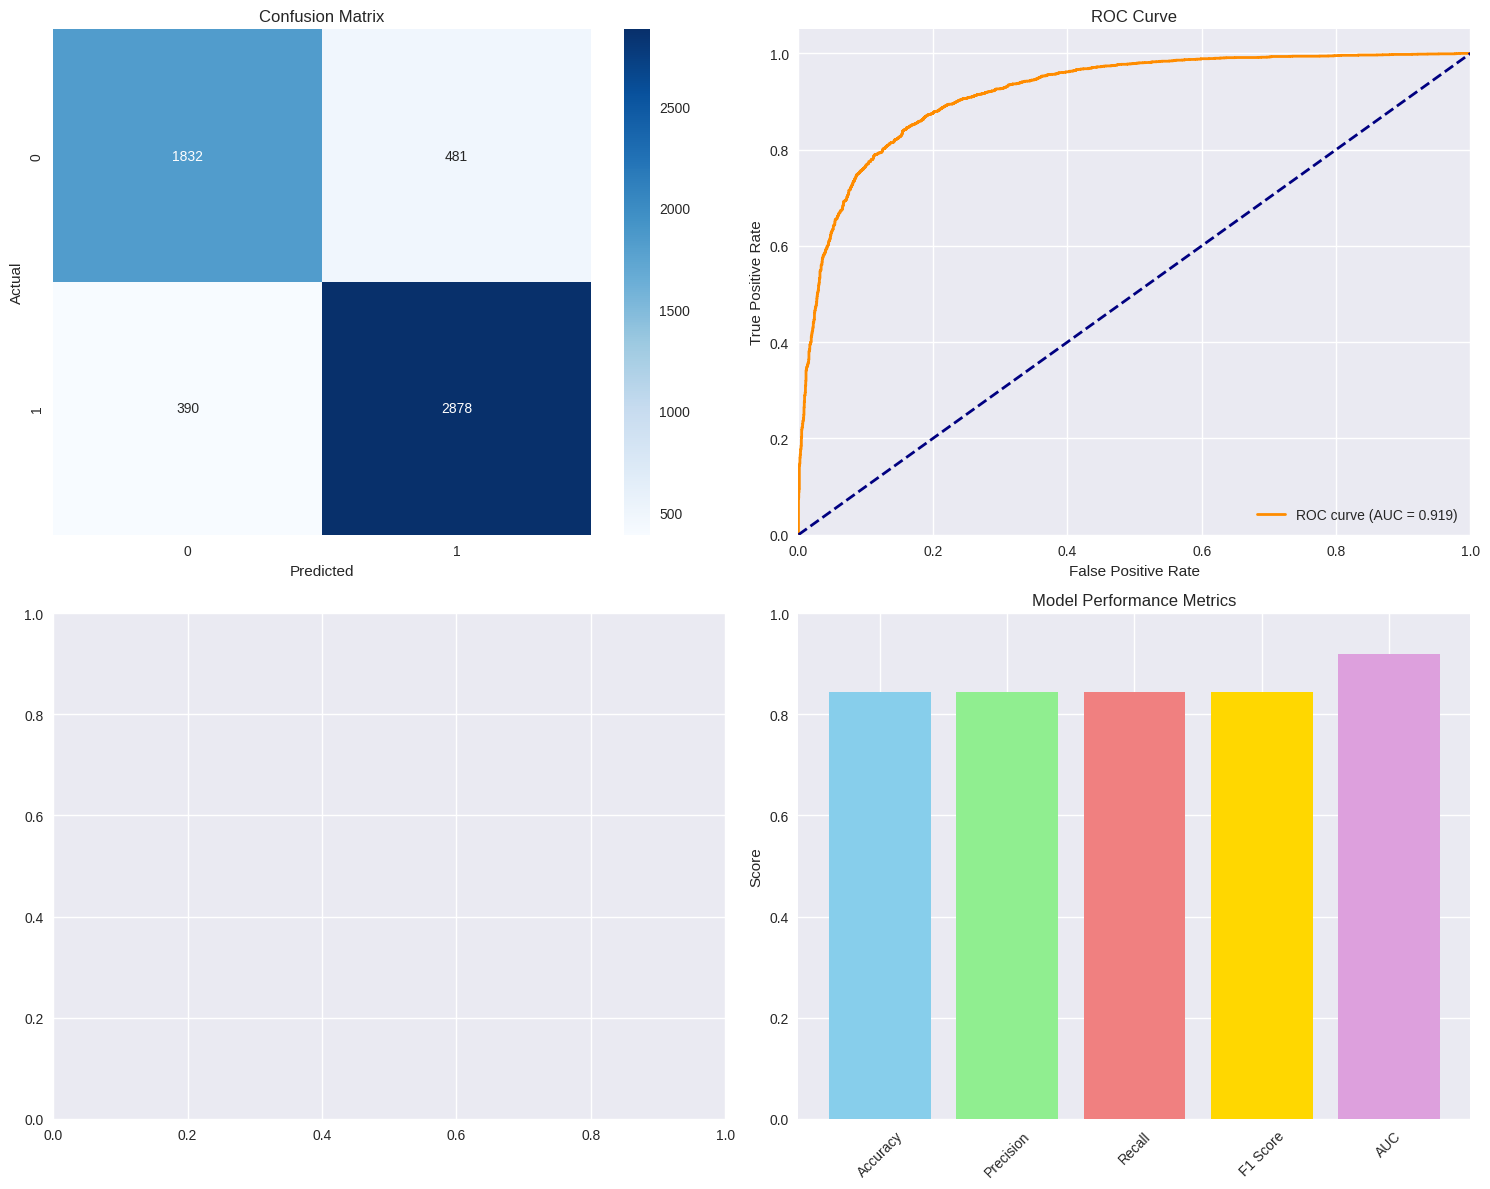


📋 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581



In [11]:
print("📊 MODEL EVALUATION")
print("="*50)

# Make predictions with final model
y_pred_final = final_model.predict(X_test_scaled)
y_pred_proba_final = final_model.predict_proba(X_test_scaled)[:, 1]

# Calculate all required metrics
accuracy = accuracy_score(y_test, y_pred_final)
logloss = log_loss(y_test, y_pred_proba_final)
auc = roc_auc_score(y_test, y_pred_proba_final)
precision = precision_score(y_test, y_pred_final, average='weighted')
recall = recall_score(y_test, y_pred_final, average='weighted')
f1 = f1_score(y_test, y_pred_final, average='weighted')

print("🎯 FINAL MODEL PERFORMANCE METRICS:")
print("="*40)
print(f"✅ Accuracy:         {accuracy:.4f}")
print(f"✅ Logarithmic Loss: {logloss:.4f}")
print(f"✅ AUC Score:        {auc:.4f}")
print(f"✅ Precision:        {precision:.4f}")
print(f"✅ Recall:           {recall:.4f}")
print(f"✅ F1 Score:         {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
print(f"\n📊 CONFUSION MATRIX:")
print(cm)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_final)
axes[0,1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.3f})')
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,1].set_xlim([0.0, 1.0])
axes[0,1].set_ylim([0.0, 1.05])
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].set_title('ROC Curve')
axes[0,1].legend(loc="lower right")

# 3. Feature Importance (if available)
if hasattr(final_model, 'feature_importances_'):
    feature_importance = final_model.feature_importances_
    feature_names = X.columns

    # Get top 10 features
    top_indices = np.argsort(feature_importance)[-10:]

    axes[1,0].barh(range(10), feature_importance[top_indices])
    axes[1,0].set_yticks(range(10))
    axes[1,0].set_yticklabels([feature_names[i] for i in top_indices])
    axes[1,0].set_xlabel('Importance')
    axes[1,0].set_title('Top 10 Feature Importance')

# 4. Metrics Summary Bar Chart
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
metrics_values = [accuracy, precision, recall, f1, auc]

axes[1,1].bar(metrics_names, metrics_values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum'])
axes[1,1].set_ylim(0, 1)
axes[1,1].set_title('Model Performance Metrics')
axes[1,1].set_ylabel('Score')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Detailed Classification Report
print(f"\n📋 DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_final))